### Polinônimo de Taylor
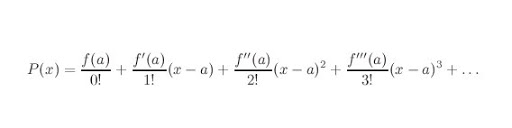

Exemplo do e^x
- Qualquer derivada é a própria função, logo com a = 0 todas as derivadas vão para 1

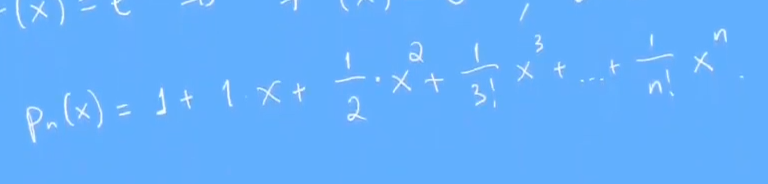

O polinômio calculado com x=1 irá aproximar de e

In [3]:
MathConstants.e

ℯ = 2.7182818284590...

In [6]:
exp(1)

2.718281828459045

In [8]:
MathConstants.e - exp(1)

0.0

Exp1:
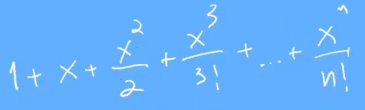

In [24]:
function exp1(x, n)
    s = 1.0
    for k = 1:n
        s += x^k / factorial(BigInt(k)) # Caso não seja bigInt ele dá overflow no cálculo do fatorial dependendo de n
    end
    return s
end

exp1 (generic function with 1 method)

In [25]:
exp1(5.0, 35) - exp(5.0)

3.441148947286642658095150763350842455773351844549152254856200587529027376875446e-15

In [26]:
eps(0.0)

5.0e-324

In [27]:
5^17 / factorial(17), eps(exp(5))

(0.0021449716601146854, 2.842170943040401e-14)

Existe uma otimização para melhorar o caso acima, pois os valores estão crescendo muito rápido apesar de estar indo para zero. 

Ideia da exp2:
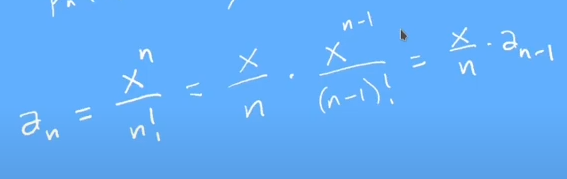

In [28]:
function exp2(x, n)
    s = 1.0
    a = 1.0
    for k = 1:n
        a = a * x / k
        s += a
    end
    return s
end

exp2 (generic function with 1 method)

In [29]:
exp2(5.0, 30)

148.4131591025759

In [33]:
exp(5)

148.4131591025766

In [32]:
exp2(5.0, 32) - exp(5)

-5.684341886080802e-14

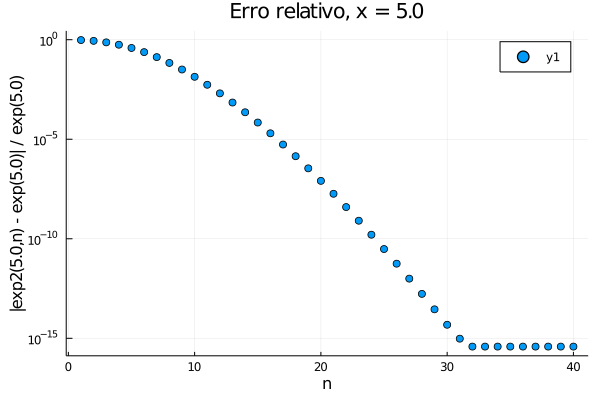

In [38]:
using Plots
N = collect(1:40)
x = 5.0

# Map em N calculando a exp2 para cada um dos elementos e o erro relativo em relação à função exp do Julia
Erro = [abs(exp2(x, n) - exp(x)) / exp(x) for n in N]

scatter(N, Erro, yaxis=:log)
xlabel!("n")
ylabel!("|exp2($x,n) - exp($x)| / exp($x)")
title!("Erro relativo, x = $x")

In [37]:
Erro

40-element Array{Float64,1}:
 0.017523096306421824
 0.0011484812448621711
 5.684024075813384e-5
 2.2581905529410607e-6
 7.490854479152387e-8
 2.132477828966674e-9
 5.3161692366096027e-11
 1.1787571370009151e-12
 2.36333170589326e-14
 5.453842398215215e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 ⋮
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16
 1.8179474660717383e-16

Podemos fazer a mesma função de exponencial porém sem receber o número de iterações, usando uma condição baseada na limitação por parte da máquina da atual série + o próximo termo comparada a atual série.

In [39]:
function exp3(x)
    s = 1.0
    a = 1.0
    k = 1
    while s + a != s 
        a = a * x / k
        s += a
        k += 1
    end
    return s
end

exp3 (generic function with 1 method)

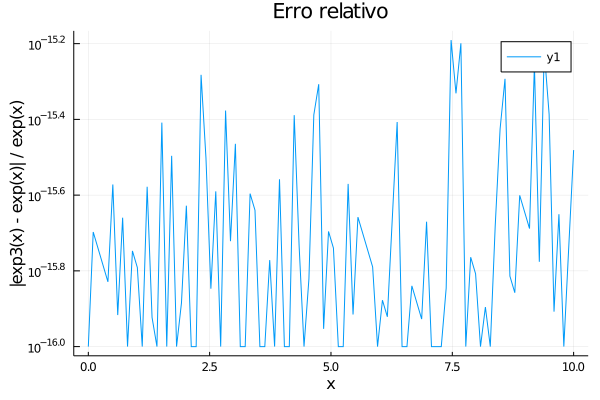

In [42]:
using Plots
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp3(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp3(x) - exp(x)| / exp(x)")
title!("Erro relativo")

scatter fica ruim para a visualização desse caso, pois os valores são mínusculos e oscilam na sua representação


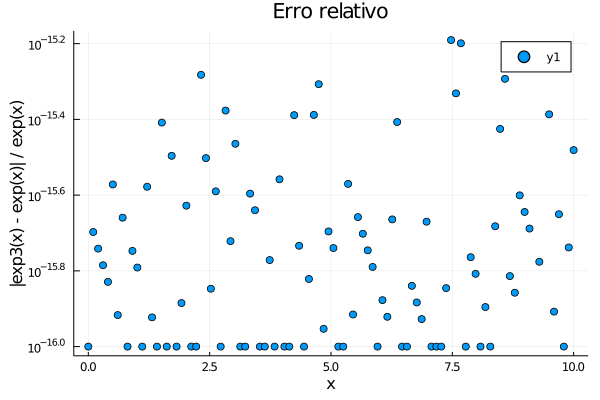

In [46]:
using Plots
println("scatter fica ruim para a visualização desse caso, pois os valores são mínusculos e oscilam na sua representação")
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp3(x) - exp(x)) / exp(x), 1e-16) for x in X]
scatter(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp3(x) - exp(x)| / exp(x)")
title!("Erro relativo")

No caso de exponenciais negativas, os termos oscilam e dessa forma erra muito a aproximação
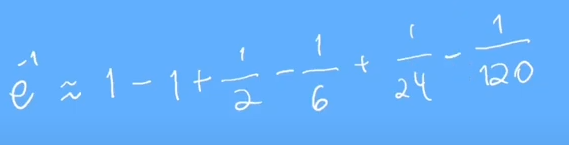

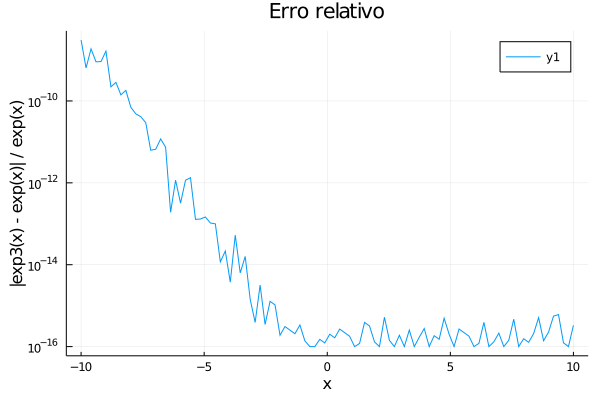

In [48]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp3(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp3(x) - exp(x)| / exp(x)")
title!("Erro relativo")

In [51]:
function exp4(x)
    if x ≥ 0
        return exp3(x)
    else
        return 1.0 / exp3(-x) # 1/e^-x = e^x
    end
end

exp4 (generic function with 1 method)

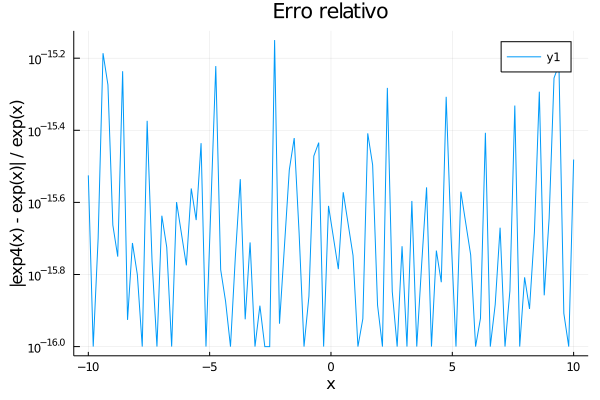

In [52]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp4(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp4(x) - exp(x)| / exp(x)")
title!("Erro relativo")